In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
df=pd.read_csv('mul_anomaly+v1.csv')

In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Anomaly
0,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Male,No,0,Not Graduate,No,3620,0,25.0,120.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0,NaN,360.0,NaN,Urban,N
96,Female,Yes,0,Graduate,No,2484,2302,137.0,360.0,1.0,Semiurban,Y
97,Male,Yes,0,Graduate,No,1977,997,50.0,360.0,1.0,Semiurban,Y


In [6]:
for i in df.columns:
    clas=df[i].dtypes    
   
    if clas=='object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

object
object
object
object
object
int64
int64
float64
float64
float64
object
object


In [38]:
le=LabelEncoder()
df1=df.copy()
for i in df1.columns:
    cls=df1[i].dtypes
    if cls=='object':
        df1[i]=df1[[i]].astype(str).apply(le.fit_transform)
    else:
        df1[i]=df1[i]

In [39]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Anomaly
0,1,0,0,0,0,5849,0,134.255319,360.0,1.000000,2,1
1,1,1,1,0,0,4583,1508,128.000000,360.0,1.000000,0,0
2,1,1,0,0,1,3000,0,66.000000,360.0,1.000000,2,1
3,1,1,0,1,0,2583,2358,120.000000,360.0,1.000000,2,1
4,1,0,0,0,0,6000,0,141.000000,360.0,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,0,0,1,0,3620,0,25.000000,120.0,1.000000,1,1
95,1,0,0,0,0,6782,0,134.255319,360.0,0.835165,2,0
96,0,1,0,0,0,2484,2302,137.000000,360.0,1.000000,1,1
97,1,1,0,0,0,1977,997,50.000000,360.0,1.000000,1,1


In [34]:
df1=df.copy()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

In [41]:
X=df1.drop('Anomaly',1)
y=df1['Anomaly']

/tmp/ipykernel_8957/1694563777.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df1.drop('Anomaly',1)


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# Feature Scaling
clf=LogisticRegression()
clf.fit(X_train,y_train)

/home/shahid/anaconda3/envs/anomaly/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pre=clf.predict(X_test)

In [44]:
y_pre

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [46]:
y_pred=np.where(y_pre==1,'anomaly','normal')

In [66]:
y_pred

array(['anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly',
       'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly',
       'normal', 'normal', 'normal', 'anomaly', 'normal', 'anomaly',
       'anomaly', 'anomaly'], dtype='<U7')

In [49]:
cm=confusion_matrix(y_test,y_pre)

In [50]:
cm

array([[ 6,  4],
       [ 0, 10]])

<Axes: >

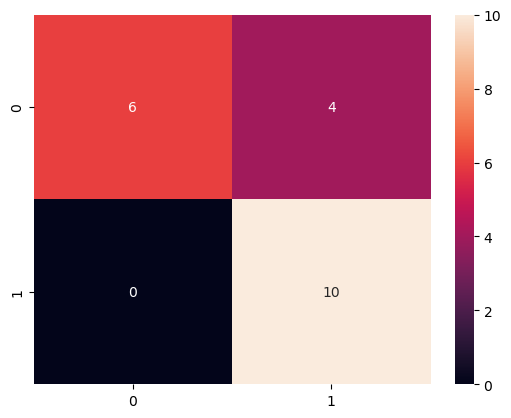

In [54]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [58]:
# predict probabilitiess
lr_probs_RF = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs_RF = lr_probs_RF[:, 1]


In [59]:
lr_probs_RF

array([0.72361974, 0.61640027, 0.9081292 , 0.76947083, 0.67330532,
       0.86522166, 0.84054   , 0.28115208, 0.31185792, 0.86319864,
       0.89069168, 0.82389339, 0.3122575 , 0.34341378, 0.27189305,
       0.79238069, 0.22072043, 0.62519563, 0.72768468, 0.87443822])

In [57]:
0.72361974+0.27638026

1.0

In [68]:
lr_precision_RF, lr_recall_RF, _ = precision_recall_curve(y_test, lr_probs_RF)
lr_f1_RF, lr_auc_RF = f1_score(y_test, y_pre), auc(lr_recall_RF, lr_precision_RF)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1_RF, lr_auc_RF))
#return (y_pred, max(lr_probs_RF))

X_test['Prediction'] = y_pred
X_test

Random Forest: f1=0.833 auc=0.779


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Prediction
26,1,1,0,0,0,2799,2253,122.0,360.000000,1.000000,1,anomaly
86,1,1,2,1,0,3333,2000,99.0,360.000000,0.835165,1,anomaly
2,1,1,0,0,1,3000,0,66.0,360.000000,1.000000,2,anomaly
55,1,1,2,0,0,2708,1167,97.0,360.000000,1.000000,1,anomaly
75,1,0,0,0,0,3750,0,113.0,480.000000,1.000000,2,anomaly
92,1,1,2,1,0,3273,1820,81.0,360.000000,1.000000,2,anomaly
16,1,0,1,1,0,3596,0,100.0,240.000000,0.835165,2,anomaly
73,1,1,3,1,0,4755,0,95.0,341.489362,0.000000,1,normal
54,0,1,1,0,1,11500,0,286.0,360.000000,0.000000,2,normal
94,1,0,0,1,0,3620,0,25.0,120.000000,1.000000,1,anomaly


In [64]:
auc(lr_recall_RF, lr_precision_RF)

0.7793736818736818

0.8333333333333333